In [824]:
from PIL import Image
import numpy as np
import pandas as pd
testnum = 27
def readimg(path) :
    img = Image.open(path)
    img_gray = img.convert('L')
    img_gray.save(f'grayscale/testImage{i}.png')
    im_matrix = np.array(img_gray)
    return im_matrix

def resizeimg(path, height, width,i) :
    try :
        img = Image.open(path)
        img_save = img.resize((width,height))
        img_save.save(f'resize/testImage{i}.png')
    except :
        img = Image.open(f'test/{i}.png')
        img_save = img.resize((width,height))
        img_save.save(f'resize/testImage{i}.png')

def crop(path, start, i):
    #img = Image.open(path).convert('L')
    img = Image.fromarray(path,'L')
    end = start + 64
    area = (start,start,end,end)
    cropped = img.crop(area)
    img_resize = cropped.resize((64,64))
    return np.array(img_resize)

for i in range (1,testnum) :
    resizeimg(f'test/{i}.jpeg', 150, 150, i)

imgArr = []
imgYUVArr = []

for i in range (1,testnum) :
    imgArr.append(readimg(f'resize/testImage{i}.png'))
targetBlock = []
for i in range (1,testnum) :
    targetBlock.append(crop(imgArr[i-1],20, i))

from scipy.fft import fft2, ifft2
import scipy.fft

import matplotlib.pyplot as plt

def plot_gallery2(images, titles, h, w, n_row=1, n_col=2):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())



In [825]:
pattern = []
def patternFind(target) :
    tmp = abs(fft2(target))
    tmp2 = np.interp(tmp, (tmp.min(), np.sort(tmp.flatten())[-2]), (0, +255)).astype('uint8')
    return scipy.fft.fftshift(tmp2)

for i in range(0, testnum-1) :
    pattern.append(patternFind(targetBlock[i]))

for i in range (0,testnum-1):
    plot_gallery2([targetBlock[i],pattern[i]*12], ["Image","2D DFT"], 64, 64)

In [826]:
threshold = 5000
def testCase(compareBlock, targetBlock) :
    global threshold
    return score(patternFind(compareBlock), patternFind(targetBlock)) < threshold

def score(comparedft,dft) :
    return np.linalg.norm(np.cov(comparedft)-np.cov(dft))

In [ ]:
import random
def selectTestCase(image) :
    start = random.randint(0,85)
    return crop(image, start, "TestCase")


testCase(test, targetBlock[24])

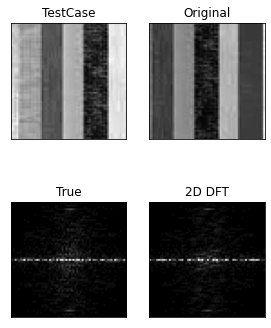

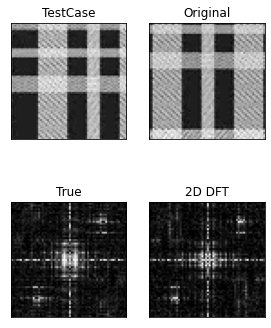

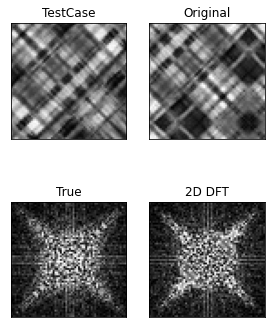

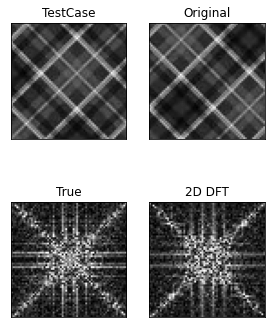

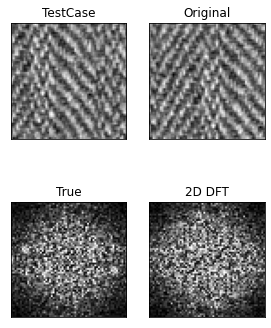

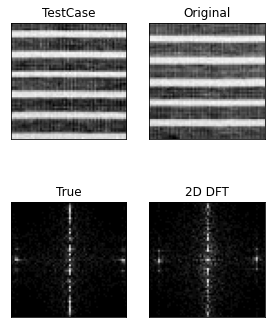

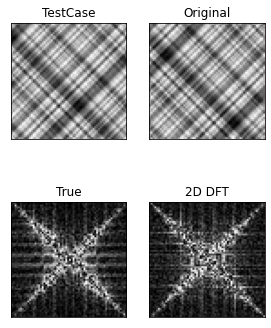

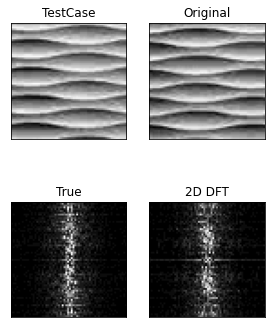

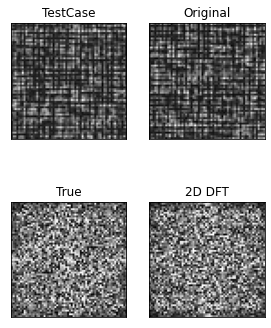

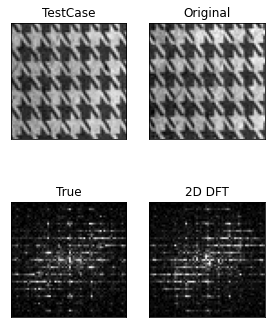

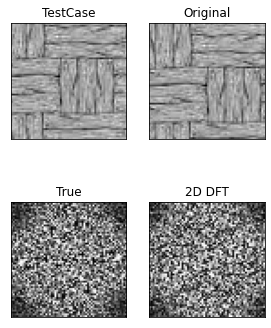

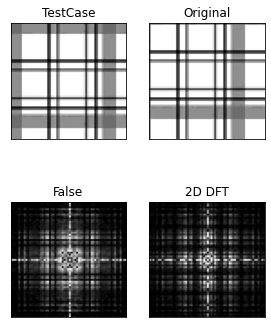

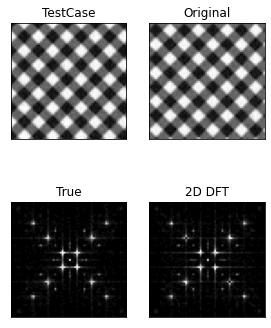

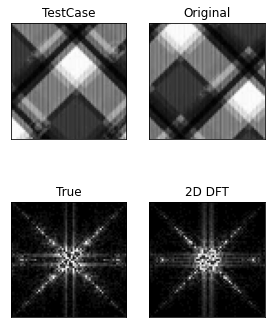

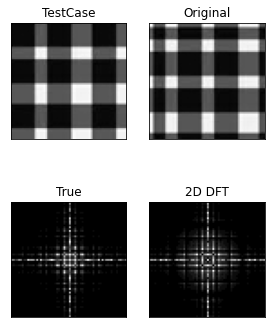

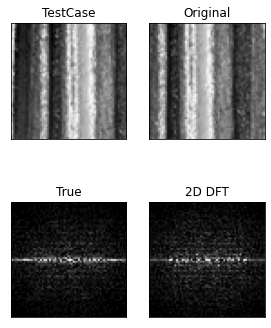

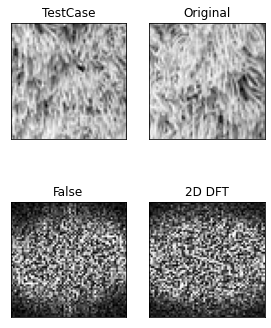

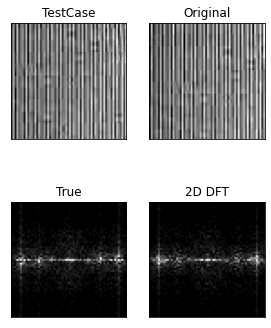

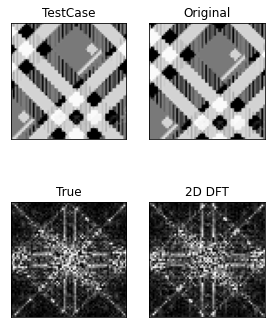

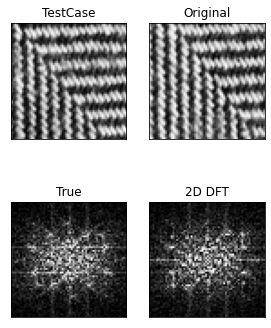

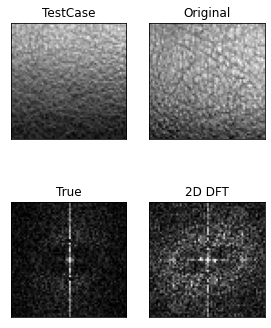

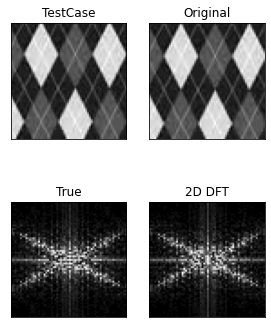

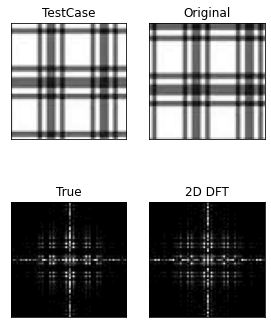

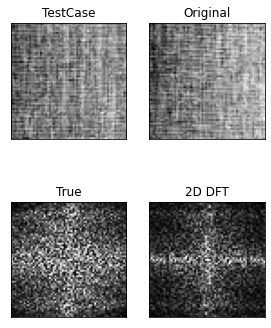

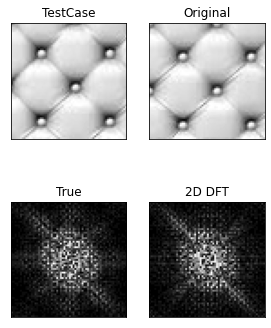

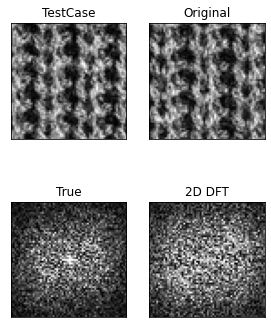

In [831]:
def plot_gallery3(images, titles, h, w, n_row=2, n_col=2):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())



for i in range (0,testnum-1):
    case = selectTestCase(imgArr[i])
    test = patternFind(case)
    plot_gallery3([case,targetBlock[i],test*12,pattern[i]*12], ["TestCase","Original",testCase(case, targetBlock[i]),"2D DFT"], 64, 64)

In [842]:
truepositive = 0
falsepositive = 0
truenegative = 0
falsenegative = 0
threshold = 3000
for i in range (0,testnum-1):
    for j in range (0,100) :
        case = selectTestCase(imgArr[i])
        test = patternFind(case)
        n = random.randint(0, testnum-2)
        if j % 2 == 0 :
            n = i
        result = testCase(case, targetBlock[n])
        if i == n and result == True:
            truepositive = truepositive + 1
        elif i == n and result == False:
            falsenegative = falsenegative + 1
        elif i != n and result == True :
            falsepositive = falsepositive + 1
        else :
            truenegative = truenegative + 1
    
    if (truepositive+truenegative)/(truepositive+truenegative+falsepositive+falsenegative) < 0.85 :
        print(f'case {i}')
    # print(truepositive)
    # print(falsenegative)
    # print(falsepositive)
    # print(truenegative)
    # print(f'Sensitivity : {truepositive/(truepositive+falsenegative)}')
    # print(f'Specificity : {truenegative/(truenegative+falsepositive)}')
    # print(f'Precision : {truepositive/(truepositive+falsepositive)}')
    # print(f'Accuracy : {(truepositive+truenegative)/(truepositive+truenegative+falsepositive+falsenegative)}')
    truepositive = 0
    falsepositive = 0
    truenegative = 0
    falsenegative = 0

case 1
case 2
case 3
case 5
case 8
case 10
case 11
case 14
case 16


PermissionError: [Errno 13] Permission denied: 'cutting/blockTestCase.png'

In [828]:
case = selectTestCase(imgArr[3])
score(abs(fft2(case)), abs(fft2(targetBlock[1])))

514146079.91462475

In [829]:
pattern[3][32][32]

255

In [830]:
np.linalg.norm(np.cov(patternFind(selectTestCase(imgArr[2]))) - np.cov(patternFind(targetBlock[1])))

4771.48462366281

In [839]:
np.cov(patternFind(selectTestCase(imgArr[2])))

array([[2.61904762, 0.67261905, 1.0218254 , ..., 0.77380952, 1.0218254 ,
        0.67261905],
       [0.67261905, 2.2358631 , 0.79737103, ..., 0.58680556, 0.79737103,
        0.87078373],
       [1.0218254 , 0.79737103, 2.67633929, ..., 0.96378968, 0.27951389,
        0.79737103],
       ...,
       [0.77380952, 0.58680556, 0.96378968, ..., 2.92757937, 0.75744048,
        0.65029762],
       [1.0218254 , 0.79737103, 0.27951389, ..., 0.75744048, 2.67633929,
        0.79737103],
       [0.67261905, 0.87078373, 0.79737103, ..., 0.65029762, 0.79737103,
        2.2358631 ]])